In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_mushroom=pd.read_csv('mushroom_csv.csv')
df_mushroom

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [3]:
df_mushroom.shape

(8124, 23)

In [4]:
df_mushroom.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [5]:
# A lot of data in 'stalk-root' is mission , we can drop this column

df_mushroom.drop(['stalk-root'],axis=1,inplace=True)

In [6]:
df_mushroom.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [7]:
df_mushroom.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


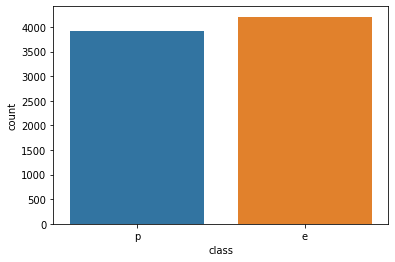

In [8]:
#We can check the count of each class of mushroom graphically
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="class",data=df_mushroom)
plt.show()

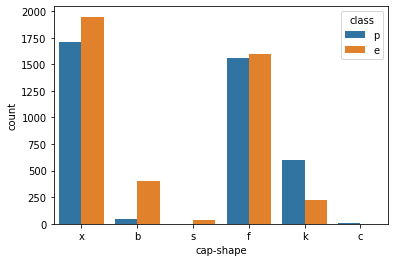

In [9]:
#We can check the count based on cap shape
sns.countplot(x="cap-shape",hue="class",data=df_mushroom)
plt.show()
# with cap-shaped as x and f both have alsmost equal count of poisonous and not edible mushrooms
#with cap shaped as k poisonous are more and with cap shaped b and s edible are more.

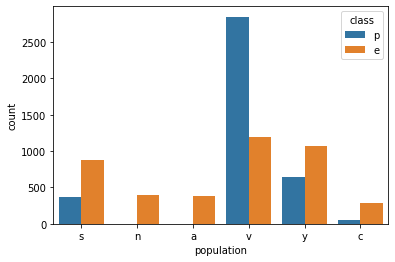

In [10]:
#Check the counts on the basis of population
sns.countplot(x="population",hue="class",data=df_mushroom)
plt.show()

In [11]:
# In this data set we need encryption as data is not in the form of string/numbers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat', 'class']
for val in list:
    df_mushroom[val]=le.fit_transform(df_mushroom[val].astype(str))
         

In [12]:
df_mushroom

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


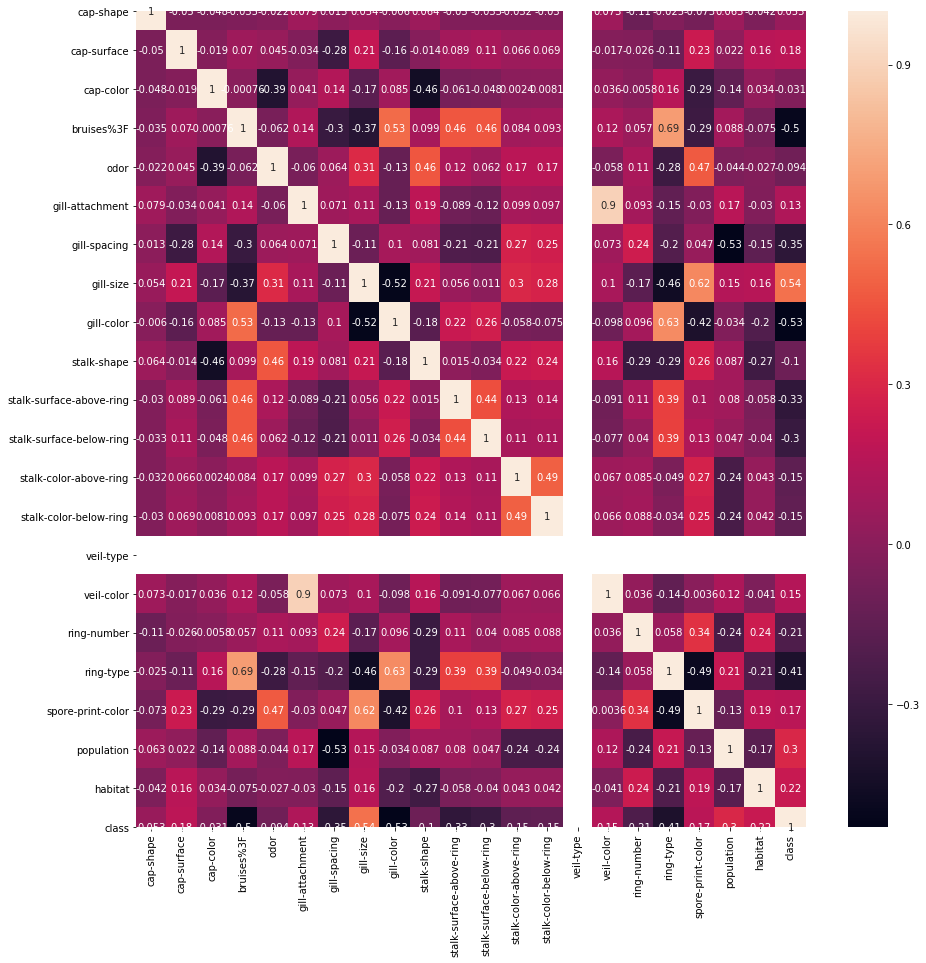

In [13]:
# Checking Correlation on heatmap
corr_mush=df_mushroom.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mush, annot= True)
plt.show()

In [14]:
# Perfroming Regression , Machine learningimport sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split



In [15]:
x=df_mushroom.iloc[:,0:-1]
x.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [16]:
y=df_mushroom.iloc[:,-1]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [17]:
max_r_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state = r_state,test_size=0.30)
    lr=linear_model.LogisticRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    r2_scr=r2_score(test_y,pred)
    print('r2_score corresponding to random state: ',r_state, 'is' , r2_scr)
    if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  42 is 0.7914298051150643
r2_score corresponding to random state:  43 is 0.7735550373040152


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  44 is 0.8031065765741513
r2_score corresponding to random state:  45 is 0.7750293837330307
r2_score corresponding to random state:  46 is 0.7800693670258887


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  47 is 0.7849023945905356
r2_score corresponding to random state:  48 is 0.7849642345438288


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  49 is 0.7735550373040152
r2_score corresponding to random state:  50 is 0.7637407711238721
r2_score corresponding to random state: 

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 51 is 0.782320250650707
r2_score corresponding to random state:  52 is 0.7701140135350661
r2_score corresponding to random state:  53 is 0.7824922392520485


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  54 is 0.7992998612678072
r2_score corresponding to random state:  55 is 0.8029050884522027


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  56 is 0.7833063994828701
r2_score corresponding to random state:  57 is 0.768332945826552
r2_score corresponding to random state: 

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 58 is 0.7600557075649444
r2_score corresponding to random state:  59 is 0.7538906741591938


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  60 is 0.7748765381756025
r2_score corresponding to random state:  61 is 0.806045749320583
r2_score corresponding to random state: 

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 62 is 0.7947446549420234
r2_score corresponding to random state:  63 is 0.7685033102414446
r2_score corresponding to random state:  64 is 0.7910198737180288


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  65 is 0.7945542552044008
r2_score corresponding to random state:  66 is 0.7488121212121213


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  67 is 0.7580434782608696
r2_score corresponding to random state: 

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 68 is 0.7735408623168505
r2_score corresponding to random state:  69 is 0.7732184744803041


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  70 is 0.7651410632965967
r2_score corresponding to random state:  71 is 0.7716467040649584


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  72 is 0.7766135769531355
r2_score corresponding to random state:  73 is 0.7780216252380773


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  74 is 0.7833707266143901
r2_score corresponding to random state:  75 is 0.7765751924664341


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  76 is 0.7832183801195944
r2_score corresponding to random state:  77 is 0.7956522914695148


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  78 is 0.7783900504788317
r2_score corresponding to random state:  79 is 0.7652904802458622
r2_score corresponding to random state:  80 is 0.7766715050196509


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  81 is 0.7979319755394956
r2_score corresponding to random state:  82 is 0.8044548032328227
r2_score corresponding to random state:  83 is 0.78139054796303


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  84 is 0.8029258001087223
r2_score corresponding to random state:  85 is 0.7636160538440872
r2_score corresponding to random state: 

C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 86 is 0.7602263901322788
r2_score corresponding to random state:  87 is 0.7892565862381709


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  88 is 0.8014604533462553
r2_score corresponding to random state:  89 is 0.8044156509545896


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  90 is 0.7585963012059879
r2_score corresponding to random state:  91 is 0.7880995582122858
r2_score corresponding to random state:  92 is 0.7697456962237943


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  93 is 0.7945254431103488
r2_score corresponding to random state:  94 is 0.8129005026668201
r2_score corresponding to random state:  95 is 0.7833304719296296
r2_score corresponding to random state:  96 is 0.7995627843788411
r2_score corresponding to random state:  97 is 0.7748158276010159


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  98 is 0.7841632200686617
r2_score corresponding to random state:  99 is 0.8161591883039281


C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arjun Rao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


r2_score corresponding to random state:  100 is 0.8029155775915497


max r2 score corresponding to  99  is  0.8161591883039281


In [18]:
print('Mean Absolute error: ', mean_absolute_error(test_y,pred))
print('Mean Square error: ', mean_squared_error(test_y,pred))

Mean Absolute error:  0.04922067268252666
Mean Square error:  0.04922067268252666


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

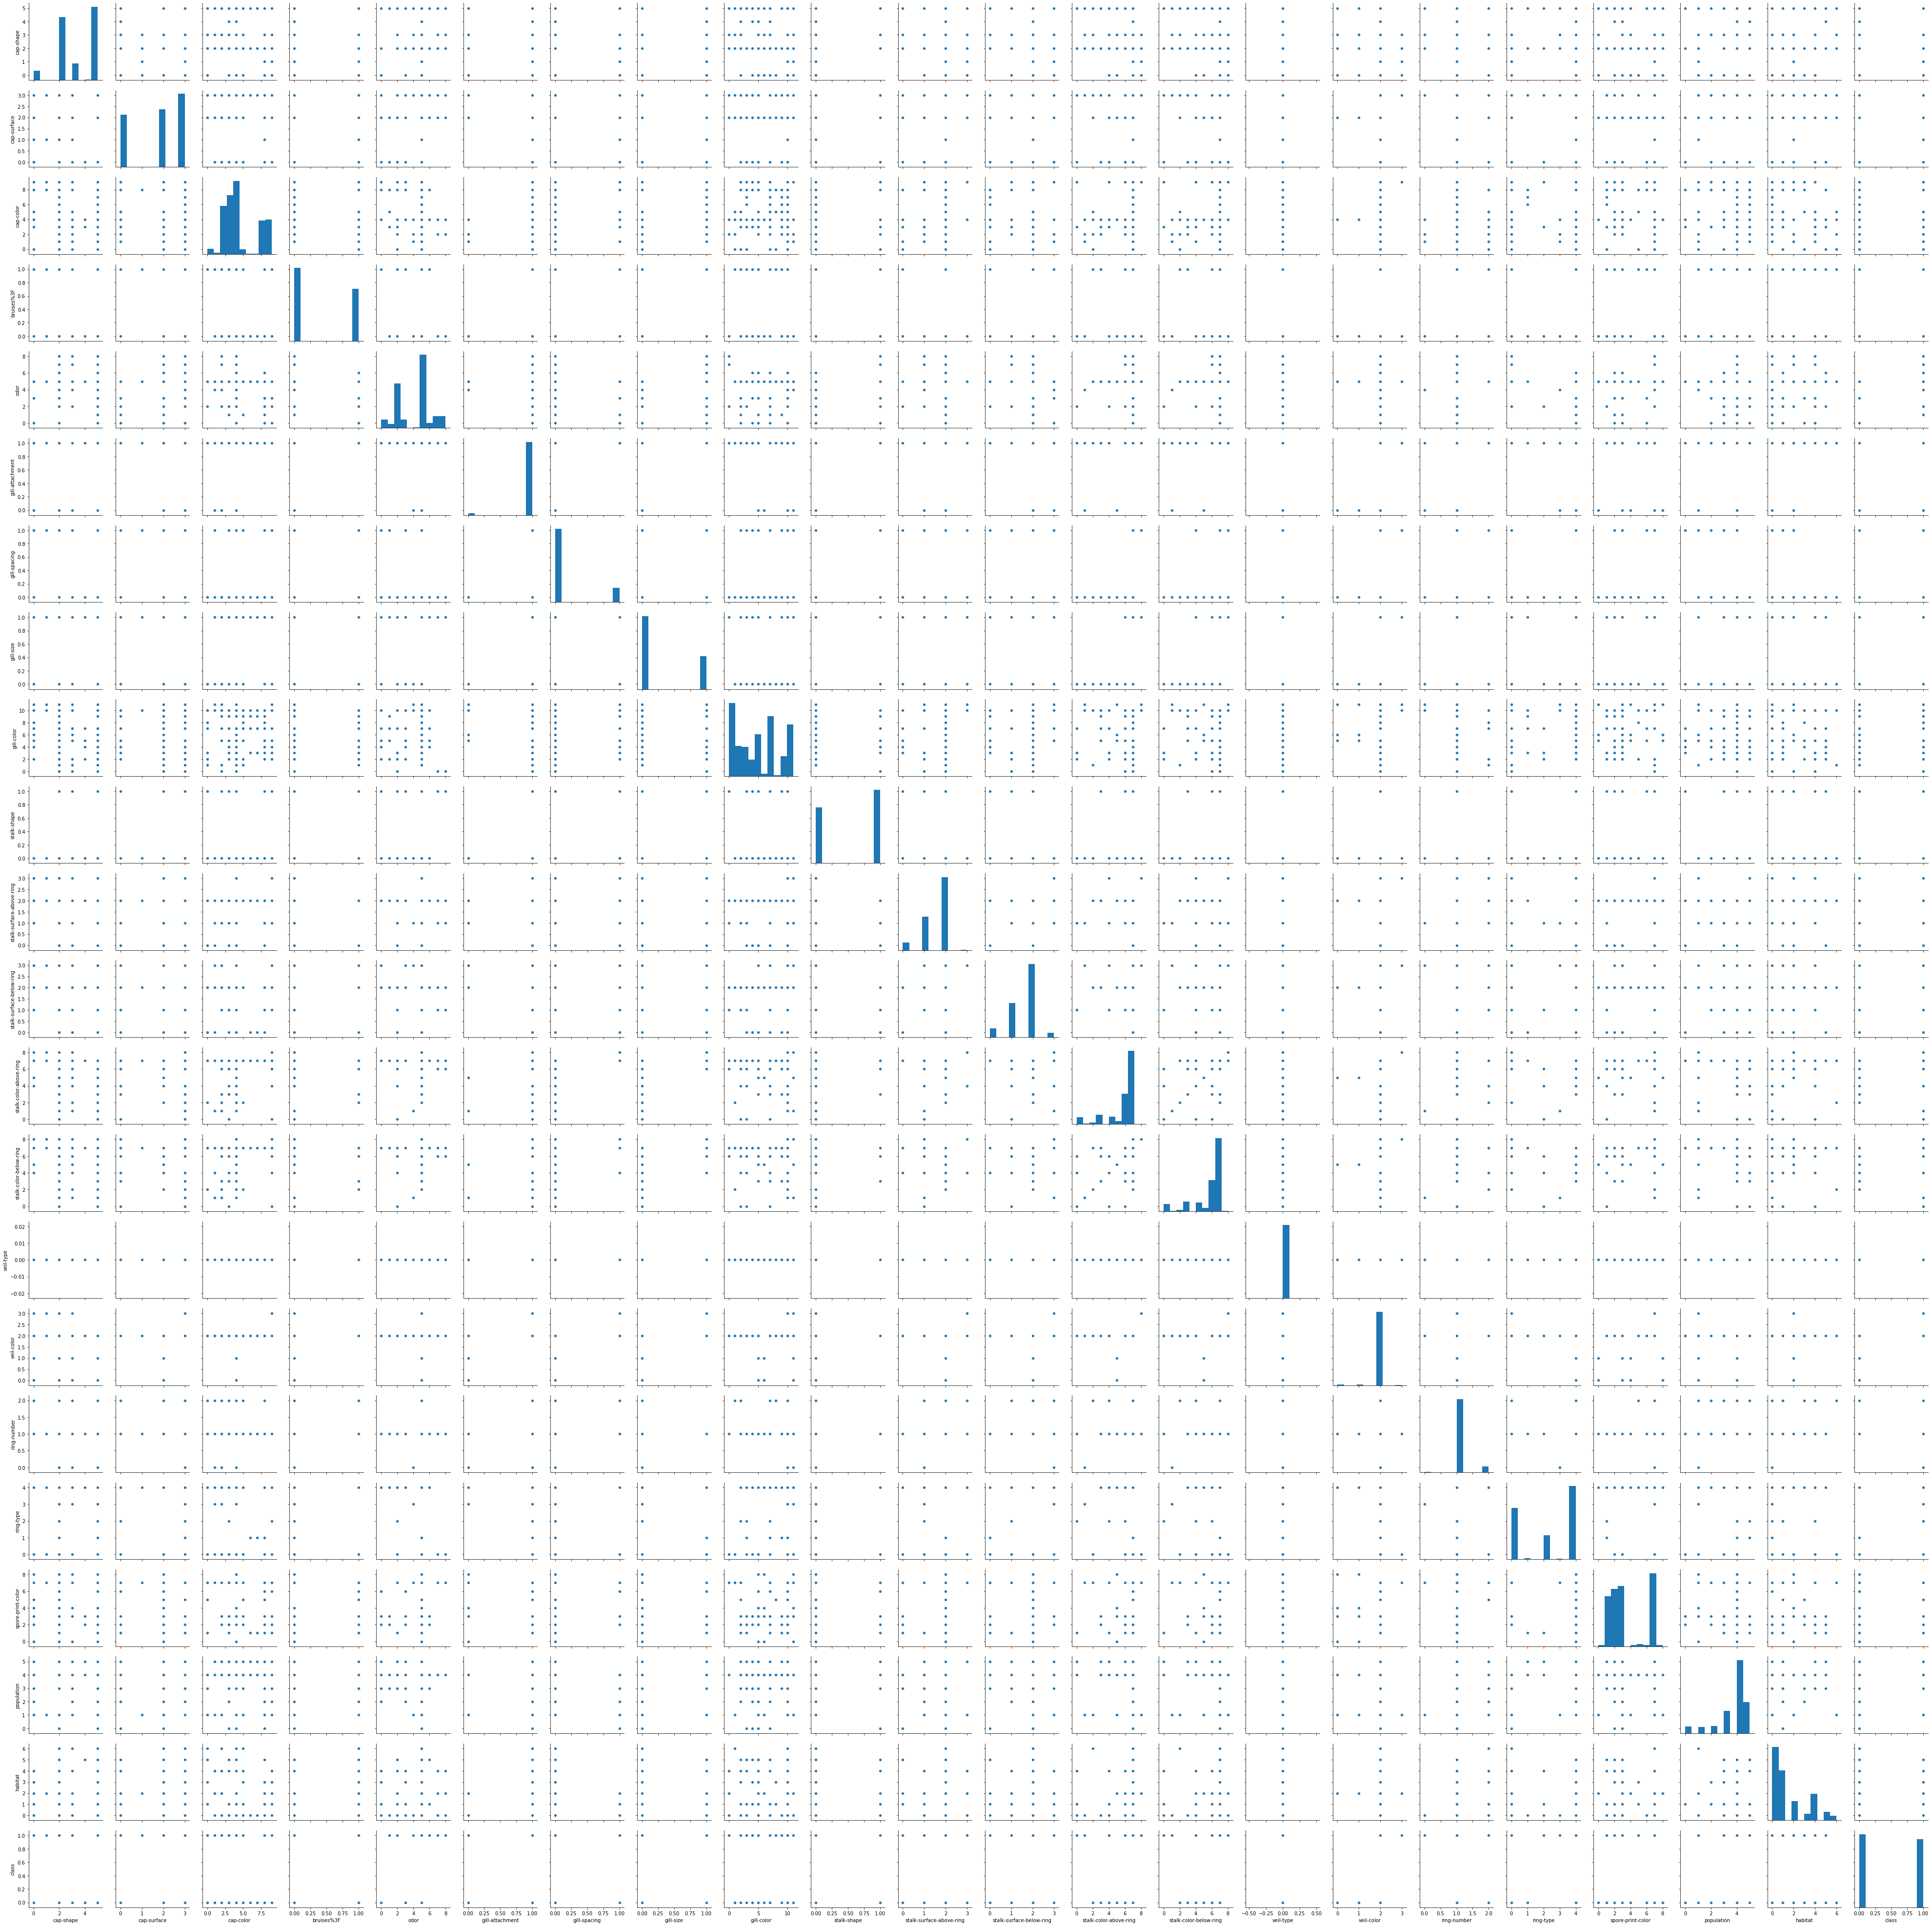

In [22]:
sns.pairplot(df_mushroom)

In [23]:
df_mushroom.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises%3F                  0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
class                       0.071946
dtype: float64

In [24]:
# Data is not skewed 

In [ ]:
# Finding best parametere usning GridsearchCV to perfom machine learning effeciently for different methods 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SV=SVC()
paramSV={'kernel' : ['linear','poly'],'random_state' : range(42,100)}
search=GridSearchCV(estimator=SV,param_grid=paramSV,scoring='accuracy',cv=5)
search.fit(train_x,train_y)
search.best_params_

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
paramDT={'criterion' : ['gini','entropy'],'random_state' : range(42,100)}
searchDT=GridSearchCV(estimator=DT,param_grid=paramDT,scoring='accuracy',cv=5)
searchDT.fit(train_x,train_y)
searchDT.best_params_

{'criterion': 'entropy', 'random_state': 42}

In [38]:
LR=LogisticRegression()
paramLR={'random_state' : range(42,100)}
searchLR=GridSearchCV(estimator=LR,param_grid=paramLR,scoring='accuracy',cv=5)
searchLR.fit(train_x,train_y)
searchLR.best_params_

{'random_state': 42}

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import sklearn.naive_bayes
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Using these above best parameters with respective methods
DT=DecisionTreeClassifier()
SV=SVC()
KNN=KNeighborsClassifier()
GN=GaussianNB()
MB=MultinomialNB()
LR=LogisticRegression()
BN=BernoulliNB()

In [34]:
models=[]
models.append(('DecisionTreeClassifier', DT))
models.append(('SVC', SV))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB', GN))
models.append(('LogisticRegression', LR))
models.append(('BernoulliNB', BN))

**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Accuracy Score =  1.0


Cross Value Score =  0.9625930661279485


roc_auc_score =  1.0


Classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



[[1258    0]
 [   0 1180]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************** 

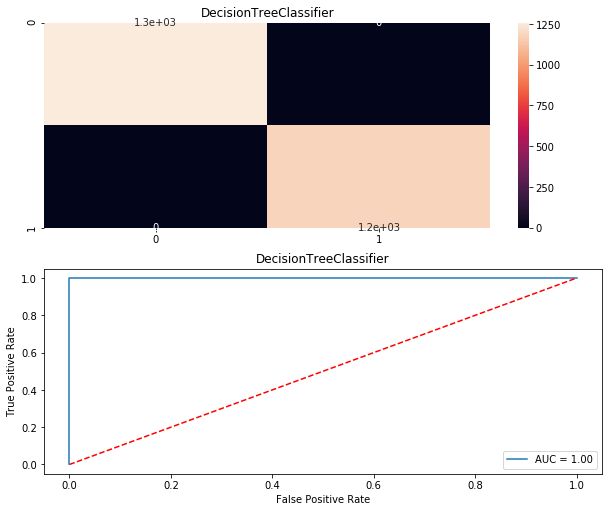

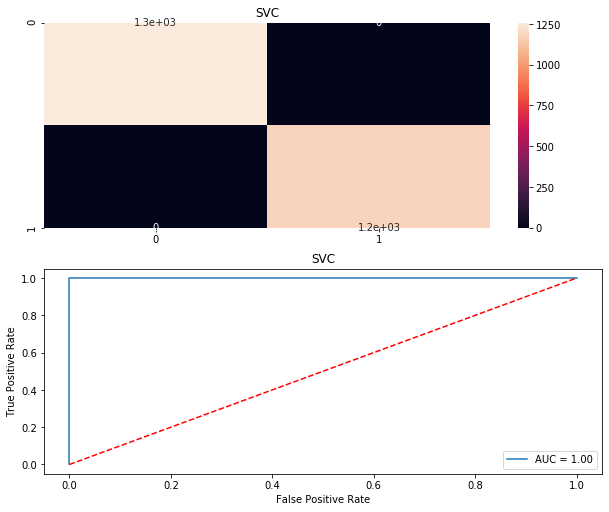

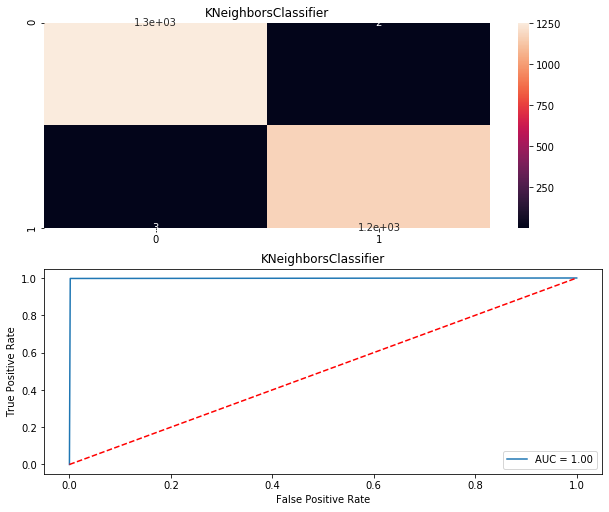

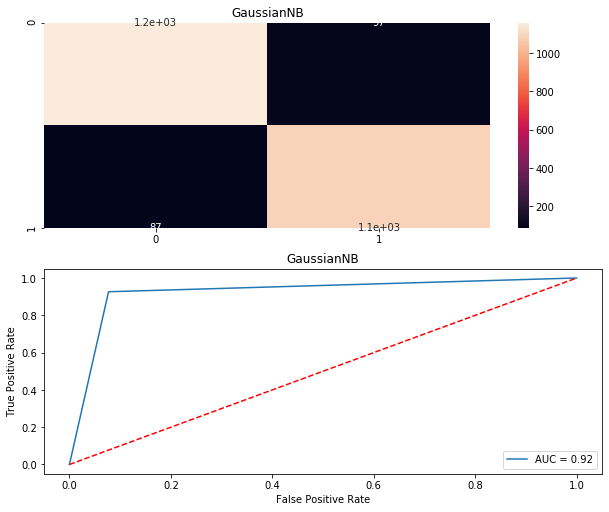

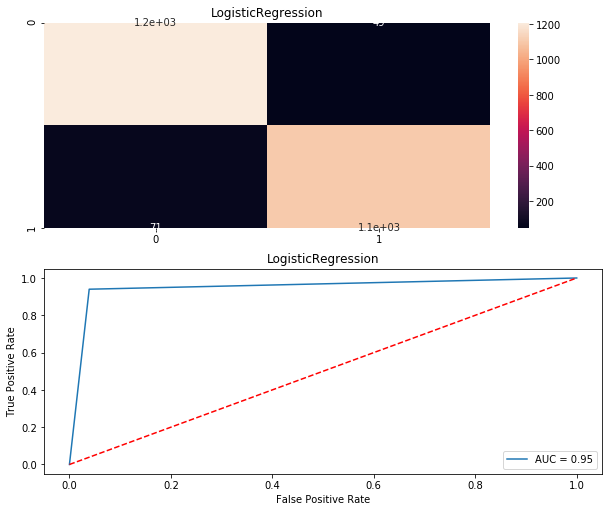

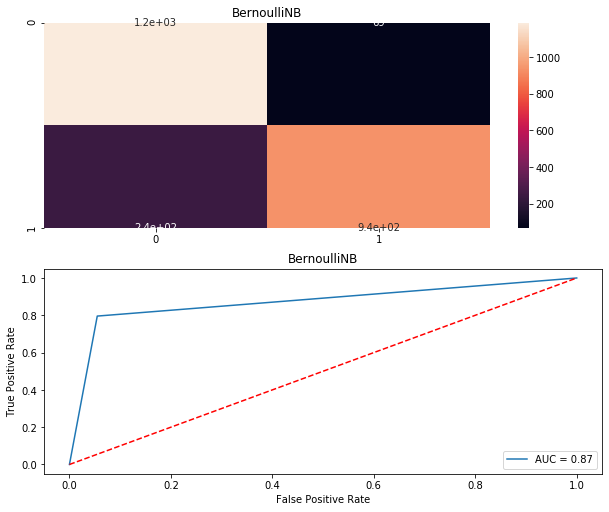

In [39]:
Model=[]
Score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('****************', name, '****************')
    print('\n')
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    print('\n')
    AS= accuracy_score(test_y,pre)
    print('Accuracy Score = ', AS)
    Score.append(AS*100)
    print('\n')
    SC=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score = ', SC)
    CVS.append(SC*100)
    print('\n')
    false_positive_rate, true_positive_rate,thresolds= roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report \n', classification_report(test_y,pre))
    print('\n')
    cm= confusion_matrix(test_y,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [40]:
result= pd.DataFrame({'Model' : Model, 'Accuracy_Score' : Score, 'Cross_val_score' : CVS, 'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,DecisionTreeClassifier,100.000000,96.259307,100.000000
1,SVC,100.000000,95.100031,100.000000
2,KNeighborsClassifier,99.794914,94.816886,99.793390
3,GaussianNB,92.452830,87.249569,92.458233
4,LogisticRegression,95.077933,87.739644,95.043990
5,BernoulliNB,87.284660,84.618931,87.045687


In [ ]:
# we can see that Suppor Vector Classifer(SVC) and Decision tree classifier model is working best among others so we should take this model as final model

In [ ]:
# To save this Project

from sklearn.externals import joblib
joblib.dump(DT,'DT_mushroom.pkl')